## Feature Enginering

In [1]:
#import packages
import pandas as pd
import pandas_ta as ta
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import sys
sys.path.append('..')
from utils.read_utils import load_stickers

In [2]:
# Get the symbols of S&P 100
tickers = load_stickers()
tickers[:5]

,Symbol,Sector
0,AAPL,Information Technology
1,ABBV,Health Care
2,ABT,Health Care
3,ACN,Information Technology
4,ADBE,Information Technology


In [3]:
# Get all stock data of all S&P 100
stocks = []
for symbol, sector in tickers.values:
    stock = pd.read_csv('../data/technical data/{}.csv'.format(symbol), thousands=',')
    stock['Date'] = pd.to_datetime(stock['Date'])
    stock['Symbol'] = symbol
    stock['Sector'] = sector
    stock.set_index(['Date'], inplace=True)
    stocks.append(stock)
stocks[0]

,Open,High,Low,Close,Adj Close,Volume,Symbol,Sector
Date,,,,,,,,
2017-01-03,28.950001,29.082500,28.690001,29.037500,27.297691,115127600,AAPL,Information Technology
2017-01-04,28.962500,29.127501,28.937500,29.004999,27.267138,84472400,AAPL,Information Technology
2017-01-05,28.980000,29.215000,28.952499,29.152500,27.405802,88774400,AAPL,Information Technology
2017-01-06,29.195000,29.540001,29.117500,29.477501,27.711329,127007600,AAPL,Information Technology
2017-01-09,29.487499,29.857500,29.485001,29.747499,27.965149,134247600,AAPL,Information Technology
...,...,...,...,...,...,...,...,...
2021-12-23,175.850006,176.850006,175.270004,176.279999,176.055695,68356600,AAPL,Information Technology
2021-12-27,177.089996,180.419998,177.070007,180.330002,180.100540,74919600,AAPL,Information Technology
2021-12-28,180.160004,181.330002,178.529999,179.289993,179.061859,79144300,AAPL,Information Technology


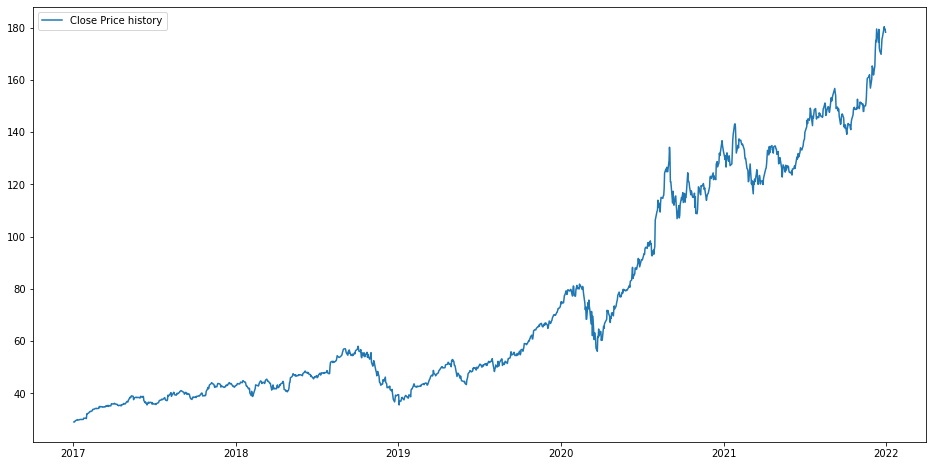

In [4]:
# Plot the stock ticker of AAPL company
apple = stocks[0].loc[(stocks[0]['Symbol'] == "AAPL") & (stocks[0]['Sector'] == "Information Technology")]
plt.figure(figsize=(16,8))
plt.plot(apple.index, apple['Close'], label='Close Price history')
plt.legend()
plt.show()

In [5]:
# Compute different techinical indicators 
for stock in stocks:
    # Moving Average Convergence Divergence (MACD) with simple moving average method 
    # and 26 days & 12 days for the slow and fast periods respectively.
    stock.ta.macd(close='close', fast=12, slow=26, append=True)
    # Money Flow Index (MFI) over a period of 14 days.
    stock.ta.mfi(high='high', low='low', close='close', volume='volume', length=14, append=True)
    # FastK and FastD values of Stochastic Oscillator using 14,3, and 3 days for FastK, FastD, SlowD respectively.
    stock.ta.stoch(high='high', low='low', close='close', k=14, d=3, smooth_k=3, append=True)
    # Relative Strenght Index (RSI) using 14 days and weighted moving average.
    stock.ta.rsi(close='close', length=14, scalar=100, drift=1, append=True)
    # Relative Strenght Index (RSI) using 14 days and weighted moving average.
    stock.ta.ad(high='high', low='low', close='close', volume='volume', length=14, scalar=100, drift=1, append=True)
    # Price Rate of Change (ROC) over 252 or 126 trading days.
    stock.ta.roc(close='close', length=126, append=True)
    # Fill the rows backward, that is, the column value of Nan, and fill it with the latter of its rows
    stock.fillna(method = 'backfill', axis = 0, inplace =True)
stocks[0]

,Open,High,Low,Close,Adj Close,Volume,Symbol,Sector,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,MFI_14,STOCHk_14_3_3,STOCHd_14_3_3,RSI_14,AD,ROC_126
Date,,,,,,,,,,,,,,,,,
2017-01-03,28.950001,29.082500,28.690001,29.037500,27.297691,115127600,AAPL,Information Technology,1.204756,0.010268,1.245785,84.990554,89.278528,90.733352,77.703975,8.872886e+07,24.055096
2017-01-04,28.962500,29.127501,28.937500,29.004999,27.267138,84472400,AAPL,Information Technology,1.204756,0.010268,1.245785,84.990554,89.278528,90.733352,77.703975,6.427541e+07,24.055096
2017-01-05,28.980000,29.215000,28.952499,29.152500,27.405802,88774400,AAPL,Information Technology,1.204756,0.010268,1.245785,84.990554,89.278528,90.733352,77.703975,1.107764e+08,24.055096
2017-01-06,29.195000,29.540001,29.117500,29.477501,27.711329,127007600,AAPL,Information Technology,1.204756,0.010268,1.245785,84.990554,89.278528,90.733352,77.703975,2.002079e+08,24.055096
2017-01-09,29.487499,29.857500,29.485001,29.747499,27.965149,134247600,AAPL,Information Technology,1.204756,0.010268,1.245785,84.990554,89.278528,90.733352,77.703975,2.551677e+08,24.055096
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-23,175.850006,176.850006,175.270004,176.279999,176.055695,68356600,AAPL,Information Technology,4.805845,-0.399474,5.205320,56.055766,66.899926,61.074213,62.880969,8.225862e+09,32.431822
2021-12-27,177.089996,180.419998,177.070007,180.330002,180.100540,74919600,AAPL,Information Technology,5.051209,-0.123288,5.174498,55.390722,75.332200,67.698399,66.890408,8.296757e+09,33.795818
2021-12-28,180.160004,181.330002,178.529999,179.289993,179.061859,79144300,AAPL,Information Technology,5.102919,-0.057263,5.160182,54.403162,78.532530,73.588219,64.950263,8.260576e+09,31.511766


In [6]:
# Daily MSCI industry index prices (MACD, 252 days, 12 days)
# Daily MSCI industry index prices (MACD, 26 days, 12 days)
names = ['Information Technology', 'Health Care','Financials', 'Consumer Discretionary', 
         'Communication Services', 'Industrials', 'Consumer Staples', 'Energy', 'Utilities', 'Real Estate', 'Materials']
industries_macd = {}
for name in names:
    industry = pd.read_csv('../data/fundamental data/Daily MSCI industry index prices/S&P 500 {} Historical Data.csv'.format(name), 
                           thousands=',', index_col=0, parse_dates=True)
    industry_macd_12_252 = industry.ta.macd(close='Price', fast=12, slow=252)
    industries_macd['{}_industry_macd_12_252'.format(name)] = industry_macd_12_252
    industry_macd_12_26 = industry.ta.macd(close='Price', fast=12, slow=26)
    industries_macd['{}_industry_macd_12_26'.format(name)] = industry_macd_12_26
industries_macd

{'Information Technology_industry_macd_12_252':             MACD_12_252_9  MACDh_12_252_9  MACDs_12_252_9
 Date                                                     
 2017-01-03            NaN             NaN             NaN
 2017-01-04            NaN             NaN             NaN
 2017-01-05            NaN             NaN             NaN
 2017-01-06            NaN             NaN             NaN
 2017-01-09            NaN             NaN             NaN
 ...                   ...             ...             ...
 2021-12-27     410.138499        8.467120      401.671379
 2021-12-28     418.508993       13.470092      405.038902
 2021-12-29     425.362414       16.258809      409.103604
 2021-12-30     427.533543       14.743951      412.789592
 2021-12-31     426.647059       11.085973      415.561085
 
 [1260 rows x 3 columns],
 'Information Technology_industry_macd_12_26':             MACD_12_26_9  MACDh_12_26_9  MACDs_12_26_9
 Date                                                  


In [7]:
# S&P 500 Futures prices (MACD, 252 days, 12 days)
sp500_future = pd.read_csv('../data/fundamental data/S&P 500 Futures Historical Data.csv', thousands=',', index_col=0, parse_dates=True)
sp500_future_macd = sp500_future.ta.macd(close='Price', fast=12, slow=252)
# Daily Trade Weighted U.S. Dollar Index against Major Currencies (MACD, 252 days, 12 days)
dollar_index = pd.read_csv('../data/fundamental data/Daily Trade Weighted U.S. Dollar Index.csv', thousands=',', index_col=0, parse_dates=True)
dollar_index_macd = dollar_index.ta.macd(close='DTWEXAFEGS', fast=12, slow=252)
# 10 year to 2 year constant maturity rate (MACD, 26 days, 12 days)
constant_maturity = pd.read_csv('../data/fundamental data/10-Year Treasury Constant Maturity Minus 2-Year Treasury Constant Maturity.csv', 
                                thousands=',', index_col=0, parse_dates=True)
constant_maturity_macd = constant_maturity.ta.macd(close='T10Y2Y', fast=12, slow=26)
sp500_future

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2017-01-02,2243.25,2241.38,2244.88,2241.38,-,0.31%
2017-01-03,2252.50,2240.75,2259.50,2239.50,1.81M,0.41%
2017-01-04,2264.25,2252.75,2267.25,2251.00,1.40M,0.52%
2017-01-05,2264.25,2264.50,2266.00,2254.00,1.32M,0.00%
2017-01-06,2271.50,2264.25,2277.00,2258.25,1.55M,0.32%
...,...,...,...,...,...,...
2021-12-27,4782.25,4717.00,4784.25,4713.25,898.70K,1.41%
2021-12-28,4778.50,4780.50,4798.00,4770.50,954.52K,-0.08%
2021-12-29,4784.50,4781.00,4796.00,4770.00,876.03K,0.13%


In [8]:
# Eliminate data in mismatched dates
for key, macd in industries_macd.items():
    macd = macd[macd.index.isin(apple.index)]
    industries_macd[key] = macd

In [9]:
# Eliminate data in mismatched dates
sp500_future_macd = sp500_future_macd[sp500_future_macd.index.isin(apple.index)]
dollar_index_macd = dollar_index_macd[dollar_index_macd.index.isin(apple.index)]
constant_maturity_macd = constant_maturity_macd[constant_maturity_macd.index.isin(apple.index)]
sp500_future_macd.shape, dollar_index_macd.shape, constant_maturity_macd.shape

((1258, 3), (1258, 3), (1258, 3))

In [10]:
# Create dataframe with all target variable
X_all = pd.DataFrame()
y_all = pd.DataFrame()
for stock in stocks:
    # Get the responding sector macd
    industry = stock['Sector'][0]
    industry_macd_12_252 = industries_macd['{}_industry_macd_12_252'.format(industry)]
    industry_macd_12_26 = industries_macd['{}_industry_macd_12_26'.format(industry)]
    # Create dataframe with the target variable
    x = pd.DataFrame({'Symbol': stock['Symbol'], 
                      'Sector': stock['Sector'],
                      'Close': stock['Close'], 
                      'MACD_12_26_9': stock['MACD_12_26_9'],
                      'MACDh_12_26_9': stock['MACDh_12_26_9'],
                      'MACDs_12_26_9': stock['MACDs_12_26_9'],
                      'MFI_14': stock['MFI_14'],
                      'STOCHk_14_3_3': stock['STOCHk_14_3_3'],
                      'STOCHd_14_3_3': stock['STOCHd_14_3_3'],
                      'RSI_14': stock['RSI_14'],
                      'AD': stock['AD'],
                      'ROC_126': stock['ROC_126'],
                      'industry_macd_12_252': industry_macd_12_252['MACD_12_252_9'],
                      'industry_macdh_12_252': industry_macd_12_252['MACDh_12_252_9'],
                      'industry_macds_12_252': industry_macd_12_252['MACDs_12_252_9'],
                      'industry_macd_12_26': industry_macd_12_26['MACD_12_26_9'],
                      'industry_macdh_12_26': industry_macd_12_26['MACDh_12_26_9'],
                      'industry_macds_12_26': industry_macd_12_26['MACDs_12_26_9'],
                      'sp500_future_macd_12_252': sp500_future_macd['MACD_12_252_9'],
                      'sp500_future_macdh_12_252': sp500_future_macd['MACDh_12_252_9'],
                      'sp500_future_macds_12_252': sp500_future_macd['MACDs_12_252_9'],
                      'dollar_index_macd_12_252': dollar_index_macd['MACD_12_252_9'],
                      'dollar_index_macdh_12_252': dollar_index_macd['MACDh_12_252_9'],
                      'dollar_index_macds_12_252': dollar_index_macd['MACDs_12_252_9'],
                      'constant_maturity_macd_12_26': constant_maturity_macd['MACD_12_26_9'],
                      'constant_maturity_macdh_12_26': constant_maturity_macd['MACDh_12_26_9'],
                      'constant_maturity_macds_12_26': constant_maturity_macd['MACDs_12_26_9']})
    # Drop the Nan value
    x = x.dropna()
    # Add the actual close price after 1 day
    y = pd.DataFrame({'Symbol': x['Symbol'], 
                      'Sector': x['Sector'],
                      'Close_after_1_day': x['Close'].shift(-1)})
    # Drop the value of the last day without the actual price data
    y = y.dropna()
    X_all = X_all.append(x[:-1])
    y_all = y_all.append(y)
X_all.shape, y_all.shape

((98802, 27), (98802, 3))

In [11]:
apple_X_all = X_all.loc[X_all['Symbol'] == "AAPL"]
apple_X_all

,Symbol,Sector,Close,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,MFI_14,STOCHk_14_3_3,STOCHd_14_3_3,RSI_14,...,industry_macds_12_26,sp500_future_macd_12_252,sp500_future_macdh_12_252,sp500_future_macds_12_252,dollar_index_macd_12_252,dollar_index_macdh_12_252,dollar_index_macds_12_252,constant_maturity_macd_12_26,constant_maturity_macdh_12_26,constant_maturity_macds_12_26
2018-01-12,AAPL,Information Technology,44.272499,0.279049,0.070511,0.208537,49.448601,86.786413,79.241559,63.933113,...,10.904313,258.996478,17.345854,241.650624,-3.884604,-0.285202,-3.599402,-0.013031,0.008353,-0.021384
2018-01-16,AAPL,Information Technology,44.047501,0.299277,0.072592,0.226685,56.387717,84.778499,83.724224,60.286756,...,11.585355,272.713460,17.166527,255.546933,-4.130166,-0.378979,-3.751187,-0.015600,0.003290,-0.018891
2018-01-17,AAPL,Information Technology,44.775002,0.369749,0.114451,0.255298,66.314712,87.455489,86.340133,66.866883,...,12.413647,277.316124,17.415353,259.900771,-4.286488,-0.428241,-3.858247,-0.016080,0.002249,-0.018328
2018-01-18,AAPL,Information Technology,44.814999,0.423939,0.134913,0.289026,73.389883,85.987594,86.073860,67.188769,...,13.294427,279.748077,15.877844,263.870232,-4.427213,-0.455173,-3.972040,-0.012283,0.004836,-0.017119
2018-01-19,AAPL,Information Technology,44.615002,0.445611,0.125267,0.320343,65.569700,91.451444,88.298176,63.848590,...,14.161947,283.602023,15.785433,267.816591,-4.534870,-0.450263,-4.084606,-0.008371,0.006999,-0.015370
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-22,AAPL,Information Technology,175.639999,4.835132,-0.470056,5.305188,57.087362,60.863070,56.927401,62.209459,...,25.514815,374.816893,-8.847126,383.664019,2.621477,0.045260,2.576217,-0.067501,0.006878,-0.074379
2021-12-23,AAPL,Information Technology,176.279999,4.805845,-0.399474,5.205320,56.055766,66.899926,61.074213,62.880969,...,24.920136,381.967331,-1.357350,383.324681,2.566386,-0.007865,2.574251,-0.063134,0.008996,-0.072130
2021-12-27,AAPL,Information Technology,180.330002,5.051209,-0.123288,5.174498,55.390722,75.332200,67.698399,66.890408,...,25.957712,397.210410,11.108583,386.101827,2.505222,-0.053965,2.559187,-0.065581,0.003799,-0.069381
2021-12-28,AAPL,Information Technology,179.289993,5.102919,-0.057263,5.160182,54.403162,78.532530,73.588219,64.950263,...,27.611241,408.976084,18.299406,390.676679,2.467770,-0.073134,2.540903,-0.063368,0.004810,-0.068178


In [15]:
apple_y_all = y_all.loc[y_all['Symbol'] == "AAPL"]
apple_y_all

,Symbol,Sector,Close_after_1_day
2018-01-12,AAPL,Information Technology,44.047501
2018-01-16,AAPL,Information Technology,44.775002
2018-01-17,AAPL,Information Technology,44.814999
2018-01-18,AAPL,Information Technology,44.615002
2018-01-19,AAPL,Information Technology,44.250000
...,...,...,...
2021-12-22,AAPL,Information Technology,176.279999
2021-12-23,AAPL,Information Technology,180.330002
2021-12-27,AAPL,Information Technology,179.289993
2021-12-28,AAPL,Information Technology,179.380005


In [12]:
# NOTE: While splitting the data into train and test set, 
# we cannot use random splitting since that will destroy the time component. 
# Split into train and validation in 80:20 ratio
X_train = pd.DataFrame()
X_test = pd.DataFrame()
y_train = pd.DataFrame()
y_test = pd.DataFrame()
for symbol,sector in tickers.values:
    X_all_one = X_all.loc[(X_all['Symbol'] == symbol) & (X_all['Sector'] == sector)]
    y_all_one = y_all.loc[(y_all['Symbol'] == symbol) & (y_all['Sector'] == sector)]
    X_train = X_train.append(X_all_one[:int(4/5*(len(X_all_one)))])
    X_test = X_test.append(X_all_one[int(4/5*(len(X_all_one))):])
    y_train = y_train.append(y_all_one[:int(4/5*(len(y_all_one)))])
    y_test = y_test.append(y_all_one[int(4/5*(len(y_all_one))):])

print("X_train.shape: " + str(X_train.shape))
print("X_test.shape: " + str(X_test.shape))
print("y_train.shape: " + str(y_train.shape))
print("y_test.shape: " + str(y_test.shape))

X_train.shape: (79002, 27)
X_test.shape: (19800, 27)
y_train.shape: (79002, 3)
y_test.shape: (19800, 3)


In [13]:
X_train.to_csv('../data/X_train.csv')
X_test.to_csv('../data/X_test.csv')
y_train.to_csv('../data/y_train.csv')
y_test.to_csv('../data/y_test.csv')

In [14]:
# Create dataframe with all target variable
X_all_7 = pd.DataFrame()
y_all_7 = pd.DataFrame()
for stock in stocks:
    # Get the responding sector macd
    industry = stock['Sector'][0]
    industry_macd_12_252 = industries_macd['{}_industry_macd_12_252'.format(industry)]
    industry_macd_12_26 = industries_macd['{}_industry_macd_12_26'.format(industry)]
    # Create dataframe with the target variable
    x = pd.DataFrame({'Symbol': stock['Symbol'], 
                      'Sector': stock['Sector'],
                      'Close': stock['Close'], 
                      'MACD_12_26_9': stock['MACD_12_26_9'],
                      'MACDh_12_26_9': stock['MACDh_12_26_9'],
                      'MACDs_12_26_9': stock['MACDs_12_26_9'],
                      'MFI_14': stock['MFI_14'],
                      'STOCHk_14_3_3': stock['STOCHk_14_3_3'],
                      'STOCHd_14_3_3': stock['STOCHd_14_3_3'],
                      'RSI_14': stock['RSI_14'],
                      'AD': stock['AD'],
                      'ROC_126': stock['ROC_126'],
                      'industry_macd_12_252': industry_macd_12_252['MACD_12_252_9'],
                      'industry_macdh_12_252': industry_macd_12_252['MACDh_12_252_9'],
                      'industry_macds_12_252': industry_macd_12_252['MACDs_12_252_9'],
                      'industry_macd_12_26': industry_macd_12_26['MACD_12_26_9'],
                      'industry_macdh_12_26': industry_macd_12_26['MACDh_12_26_9'],
                      'industry_macds_12_26': industry_macd_12_26['MACDs_12_26_9'],
                      'sp500_future_macd_12_252': sp500_future_macd['MACD_12_252_9'],
                      'sp500_future_macdh_12_252': sp500_future_macd['MACDh_12_252_9'],
                      'sp500_future_macds_12_252': sp500_future_macd['MACDs_12_252_9'],
                      'dollar_index_macd_12_252': dollar_index_macd['MACD_12_252_9'],
                      'dollar_index_macdh_12_252': dollar_index_macd['MACDh_12_252_9'],
                      'dollar_index_macds_12_252': dollar_index_macd['MACDs_12_252_9'],
                      'constant_maturity_macd_12_26': constant_maturity_macd['MACD_12_26_9'],
                      'constant_maturity_macdh_12_26': constant_maturity_macd['MACDh_12_26_9'],
                      'constant_maturity_macds_12_26': constant_maturity_macd['MACDs_12_26_9']})
    # Drop the Nan value
    x = x.dropna()
    # Add the actual close price after 7 day
    y = pd.DataFrame({'Symbol': x['Symbol'], 
                      'Sector': x['Sector'],
                      'Close_after_7_day': x['Close'].shift(-7)})
    # Drop the value of the last 7 days without the actual price data
    y = y.dropna()
    X_all_7 = X_all_7.append(x[:-7])
    y_all_7 = y_all_7.append(y)
X_all_7.shape, y_all_7.shape

((98208, 27), (98208, 3))

In [15]:
# NOTE: While splitting the data into train and test set, we cannot use random splitting since that will destroy the time component. 

# Split into train and validation in 80:20 ratio
X_train_7 = pd.DataFrame()
X_test_7 = pd.DataFrame()
y_train_7 = pd.DataFrame()
y_test_7 = pd.DataFrame()
for symbol,sector in tickers.values:
    X_all_one = X_all_7.loc[(X_all_7['Symbol'] == symbol) & (X_all_7['Sector'] == sector)]
    y_all_one = y_all_7.loc[(y_all_7['Symbol'] == symbol) & (y_all_7['Sector'] == sector)]
    X_train_7 = X_train_7.append(X_all_one[:int(4/5*(len(X_all_one)))])
    X_test_7 = X_test_7.append(X_all_one[int(4/5*(len(X_all_one))):])
    y_train_7 = y_train_7.append(y_all_one[:int(4/5*(len(y_all_one)))])
    y_test_7 = y_test_7.append(y_all_one[int(4/5*(len(y_all_one))):])

print("X_train_7.shape: " + str(X_train_7.shape))
print("X_test_7.shape: " + str(X_test_7.shape))
print("y_train_7.shape: " + str(y_train_7.shape))
print("y_test_7.shape: " + str(y_test_7.shape))

X_train_7.shape: (78507, 27)
X_test_7.shape: (19701, 27)
y_train_7.shape: (78507, 3)
y_test_7.shape: (19701, 3)


In [16]:
X_train_7.to_csv('../data/X_train_7.csv')
X_test_7.to_csv('../data/X_test_7.csv')
y_train_7.to_csv('../data/y_train_7.csv')
y_test_7.to_csv('../data/y_test_7.csv')